<a href="https://colab.research.google.com/github/Kimgabe/AIFFEL_Online_Quest/blob/main/Quste10/%5BML_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%5D_%F0%9F%A6%84_%EA%B0%80%EB%9E%8F%2C_%EB%AA%AC%EC%8A%A4%ED%84%B0%EB%B3%BC!_%EC%A0%84%EC%84%A4%EC%9D%98_%ED%8F%AC%EC%BC%93%EB%AA%AC_%EC%B0%BE%EC%95%84_%EC%82%BC%EB%A7%8C%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Intro. 프로젝트 설명

- AIFFEL에서 진행하는 머신러닝 파트의 마지막 퀘스트 입니다.
- 2주동안 배운 지도, 비지도 학습 등에 대한 내용을 활용해서 케글의 포멧몬 데이터를 활용해서 문제를 풉니다.
- 기한은 2023년 12월 1일 학습시간(10:20~18:20) 동안 입니다.
- 프로젝트의 목적은 아래와 같습니다.

---

1. 다양한 피처가 있는 데이터셋을 밑바닥부터 샅샅이 뜯어보고, 전설의 포켓몬을 분류하기 위한 피처에는 무엇이 있는지 생각해 봅시다.
2. 모델 학습을 시작하기 전 모든 컬럼에 대해 그래프 시각화, 피벗 테이블 등을 활용하며 다양한 방법으로 충분한 EDA를 진행합니다.
3. 모델 학습에 넣기 위해서 전처리가 필요한 범주형/문자열 데이터에 대한 전처리를 원-핫 인코딩 등으로 적절하게 진행합니다.
4. 전체 데이터셋을 train/test 데이터셋으로 나누고, 적절한 분류 모델(Decision Tree)을 선택해 학습시키며 베이스라인과 비교합니다.

---

- 정리하자면 최종 목적은 전설의 포켓몬을 분류(classification)하기 위한 모델을 생성하는 것입니다.

# 데이터 설명

- 데이터는 [캐글의 포멧몬 데이터셋](https://www.kaggle.com/datasets/abcsds/pokemon)입니다.
- 각 데이터에 대한 설명은 아래와 같습니다.
---
- #: 각 포켓몬의 고유한 식별 번호
- Name: 각 포켓몬의 이름
- Type 1: 각 포켓몬의 속성 유형 1. 이 속성은 공격에 대한 취약점과 저항력을 결정
- Type 2: 일부 포켓몬은 이중 속성을 가지며 2개의 유형을 가질 수 있음
- Total: 이 항목 이후에 나오는 모든 스탯의 합계로, 포켓몬의 종합적인 강도를 의미
- HP: 체력 포인트로, 포켓몬이 기절하기 전에 얼마나 많은 데미지를 버틸 수 있는지를 나타내는 지표
- Attack: 일반 공격(예: 긁기, 주먹)에 대한 기본 수정자로, 공격 데미지를 결정하는 지표
- Defense: 일반 공격에 대한 기본 데미지 저항도를 의미
- SP Atk: 특수 공격에 대한 기본 수정자로, 특수 공격 기술(예: 화염 폭발, 버블 빔)의 데미지를 결정하는 지표
- SP Def: 특수 공격에 대한 기본 데미지 저항도를 의미
- Speed: 각 포켓몬의 속도로, 매 라운드마다 어떤 포켓몬이 먼저 공격할지를 결정하는 지표

- 먼저 데이터 분석에 앞서 간단한 EDA를 수행해 보겠습니다.

# EDA

## 데이터 불러오기

In [ ]:
# 기본 필요 라이브러리 불러오기

import numpy as np
import pandas as pd
from tqdm import tqdm

# 컬럼 전체 확인 가능하도록 출력 범위 설정
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# 불필요한 경고 표시 생략
import warnings
warnings.filterwarnings(action = 'ignore')

In [ ]:
# 원본데이터 불러오기
df = pd.read_csv('../data/Pokemon.csv')

pokemon = df.copy() # 원본 데이터를 복사해서 사용
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
pokemon.shape

(800, 13)

In [ ]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### 전설의 포켓몬 데이터 살펴보기

In [ ]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [ ]:
# 중복된 개체 유무 확인
len(legendary['Name'].unique())

65

- 다행히 중복되거나 한 객체는 없이 65마리의 전설의 포켓못이 있습니다.
- 단순히 '전설의 포켓몬중 아무거나 1마리' 를 잡는거라면 상대적으로 쉬울 수 있지만, 특정 개체를 분류하고 잡아내야 한다면 상당히 데이터가 부족해 보입니다.
- 최대한 단순한 모델을 쓰거나 적합한 feature extraction이 동반되어야 좋은 결과를 도출할 수 있을 것 같습니다.

### 일반 포켓몬 데이터 살펴보기

In [ ]:
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
# 중복된 개체 유무 확인
len(ordinary['Name'].unique())

735

- 전설의 포켓못을 제외한 모든 포켓몬 735마리가 모두 일반 포켓몬입니다.

### 빈 데이터 확인하기

In [ ]:
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

- Type 2 컬럼이 비어 있는 포켓본이 전체 포켓몬의 약 1/3 정도에 해당합니다.
- 결측치를 무시하기에는 전체 데이터 대비 너무 큰 비중입니다.
- 이에 대한 적절한 전처리가 필요해 보입니다.
- 데이터를 더 살펴보면서 이 결측치들을 어떻게 처리할지 고민해 보겠습니다.

### 각 컬럼의 데이터 살펴보기

#### '#' 컬럼 : 포켓몬의 고유번호

In [ ]:
len(set(pokemon["#"]))

721

- set으로 중복제거를 했는데 721개의 값이 나온 것으로 보아 모든 값이 unique한 값들은 아니라는 것 같습니다.
- 캐글의 데이터셋 설명으로는 '#'은 고유 포켓몬의 식별번호라고 했는데 중복된은 값들이 있는 것 같습니다.
- 어떤 중복값들이 있는지 살펴 보겠습니다.

In [ ]:
pokemon[pokemon["#"] == 6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


- 포켓몬 번호를 보니 #이 6번인 포켓몬은 리자몽(Charizard)이고, 이로 부터 진화한 'CharizardMega Charizard X' 와 'CharizardMega Charizard Y'가 같은 고유번호를 가지고 있는 것 같습니다.
- 정보를 찾아보니 Mega Charizard은 Charizard으로 부터 진화한 포켓몬이고 그 종류가 X, Y로 나뉘는 것 같습니다.
- 못보던 사이에 포켓몬에도 많은 변화가 있었네요..

#### 'Name' 컬럼 :  포켓몬 이름

In [ ]:
len(set(pokemon["Name"]))

800

- 포켓몬의 이름은 중복을 제거해도 전체 데이터셋의 개수와 같은 800개입니다.
- 외려 '#'보다는 이름이 고유값으로서 포켓몬을 분류하는 코드로 사용하기에 적합해 보입니다.(unique한 값)

#### Type 1 & Type 2 : 포켓몬의 속성

In [ ]:
# 무작위로 2마리 포켓몬 살펴보기
pokemon.loc[[6, 10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


In [ ]:
pokemon[['Type 1', 'Type 2']].isnull().sum()

Type 1      0
Type 2    386
dtype: int64

- 6번 포켓몬인 Charizard는 Fire와 Flying 속성 두 가지를, 8번 포켓몬인 Wartortle은 Water 속성 단 한 가지만 가지고 있습니다.
- null값을 비교해보니 더 확실해 지는 것 같습니다. 컬럼의 특성상 한마리의 포캣몬은 최소1개, 최대 2개의 Type을 가질 수 있는 것 같습니다.
- 각 속성의 종류는 몇개인지 살펴보겠습니다.

In [ ]:
type1_count = len(set(pokemon["Type 1"]))
type2_count = len(set(pokemon["Type 2"]))

print(f'Type 1의 종류: {type1_count}개')
print(f'Type 2의 종류: {type2_count}개')

Type 1의 종류: 18개
Type 2의 종류: 19개


- 각 타입별로 고유 타입의 수가 다릅니다.
- 어떤 차이가 있는지 파이선의 차집합 개념을 사용해 살펴보겠습니다.

In [ ]:
type2_difference = set(pokemon["Type 2"]) - set(pokemon["Type 1"])
difference_message = f'Type 2와 Type 1의 차이는: {", ".join(map(str, type2_difference))} 입니다.'

print(difference_message)

Type 2와 Type 1의 차이는: nan 입니다.


- nan값으로 인해 차이가 발생하고 있음을 파악했습니다.
- 결국 Type1 이든 2이든 모두 같은 범위의 속성값을 갖고 있음을 알 수 있습니다.
- 포켓몬들의 모든 타입정보를 types라는 변수에 저장하겠습니다.
- 이 변수는 차후 분석에 사용하겠습니다.

In [ ]:
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Fire', 'Water', 'Flying', 'Fairy', 'Dragon', 'Normal', 'Steel', 'Bug', 'Grass', 'Dark', 'Ground', 'Fighting', 'Ice', 'Rock', 'Poison', 'Psychic', 'Ghost', 'Electric']


- Type 2 에서 nan값을 가진 포켓몬은 어떤 포켓몬일까요?

In [ ]:
pokemon["Type 2"].isna().sum()

386

- 전체 포켓몬중 386마리는 Type1의 속성만을 가진 단일속성의 포켓몬임을 알 수 있습니다.
- Type 1 포켓몬의 분포에 대해 시각화를 해서 더 자세히 살펴보겠습니다.

#### Type 1 포켓몬 plot

- 분석의 목적은 전설의 포켓몬을 분류해내는 것이므로 일반 포켓몬과 전설 포켓몬을 분류해서 특징을 살펴보겠습니다.

In [ ]:
# 필요 라이브러리 불러오기
import koreanize_matplotlib # 한글출력 자동실행 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

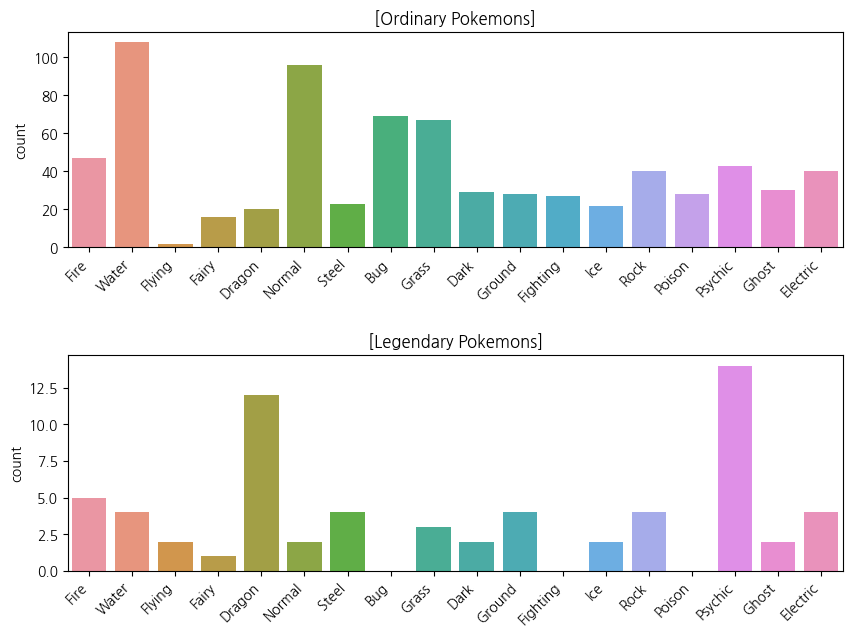

In [ ]:
plt.figure(figsize=(10, 7))

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.xticks(rotation=45, ha="right")  # 라벨 우측으로 기울이기

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.xticks(rotation=45, ha="right")  # 라벨 우측으로 기울이기

# 그래프 간 간격 조정
plt.subplots_adjust(hspace=0.5)  # 간격 조절

plt.show()

- 전설의 포켓몬의 경우 `Fighting` 타입이나 `Poison` 타입, 그리고 `Bug` 타입의 포켓몬이 없는 것이 특징입니다.
- 또한, 일반 포켓몬이 `Normal` 타입이나 `Water` 타입의 분포가 많은 것에 비해 전설의 포켓몬은 `Psychic` 타입이나 `Dragon` 타입의 포켓몬이 많은 것 같습니다.
- 이는 차후에 **모델을 구축할때 염두해두면 좋을 것 같은 포인트**입니다.
- 다음으로 각 속성별로 전설 포켓몬이 몇퍼센트씩 있는지 살펴보겠습니다.

#### Type 1속 Legendary 포켓몬 분포비율

In [ ]:
# Type1별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


- Legendary 비율이 가장 높은 속성은 Flying으로, 50%의 비율을 갖습니다.
- **날아다니는 포켓몬은 꽤 높은 비율로 전설의 포켓몬임을 유추**할 수 있습니다.
- 이또한 차후 모델 구축시 고려해야할 포인트 입니다.

#### Type 2 포켓몬 plot

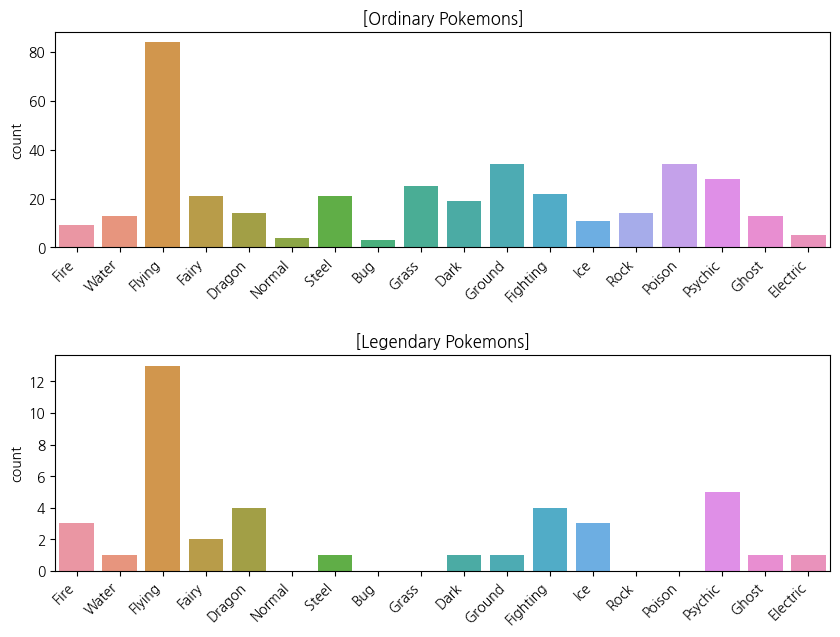

In [ ]:
plt.figure(figsize=(10, 7))

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.xticks(rotation=45, ha="right")  # 라벨 우측으로 기울이기

plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.xticks(rotation=45, ha="right")  # 라벨 우측으로 기울이기

# 그래프 간 간격 조정
plt.subplots_adjust(hspace=0.5)  # 간격 조절

plt.show()

- Type 2의 경우도 Type 1과 마찬가지로 두 포켓몬군간에 차이가 크게 보입니다.
- Flying 속성의 경우 두 경우 다 가장 많지만, 일반 포켓몬에는 Grass, Rock, Poison같은 속성이 많은 반면 전설의 포켓몬은 하나도 없습니다.
- 또한 전설 포켓몬의 경우 여전히 Dragon, Psychic과 더불어 Fighting과 같은 속성이 많습니다.

#### Type 2속 Legendary 포켓몬 분포비율

In [ ]:
# Type2별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


- Type 2에서는 Fire 속성 포켓몬의 Legendary 비율이 25%로 가장 높습니다.
- 뒤이어 Dragon 타입도 22%로 높은 편에 속합니다.

#### Total : 모든 스탯의 총합

- Intro에서 보았듯이 1마리의 포켓몬은 총 6개의 스탯값을 가집니다.
- 이 값들을 모두 합친것이 Total 입니다.
- 모든 스탯의 정보를 stats라는 변수에 저장하겠습니다.

In [ ]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

- 실제로 6개 스탯의 총합과 데이터에 제공된 Total값이 맞는지 확인해보겠습니다.
- 먼저 가장 첫번째 포켓몬에 대해 일치 여부를 확인해보겠습니다.

In [ ]:
print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


- 이런 Total의 값이 전체 포켓몬에 대해서도 일치하는지 stats를 사용해 계산하고 확인해보겠습니다..
    - pandas의 sum()함수를 응용합니다.

In [ ]:
# 'pokemon['Total'].values'와 'pokemon[stats].values'의 총합이 같은 포켓몬의 수 확인
count_same_total = np.sum(pokemon['Total'].values == np.sum(pokemon[stats].values, axis=1))

# 결과 출력
print("Total 값과 stats의 총합이 같은 포켓몬의 수:", count_same_total)

Total 값과 stats의 총합이 같은 포켓몬의 수: 800


- Total의 값과 모든 stats의 총합이 같은 포켓몬은 800마리로 전부 같은 값을 갖고 있음을 알 수 있습니다.

#### Total값에 따른 분포 plot

- Total값과 Legendary간의 관계에 대해서도 살펴보겠습니다.

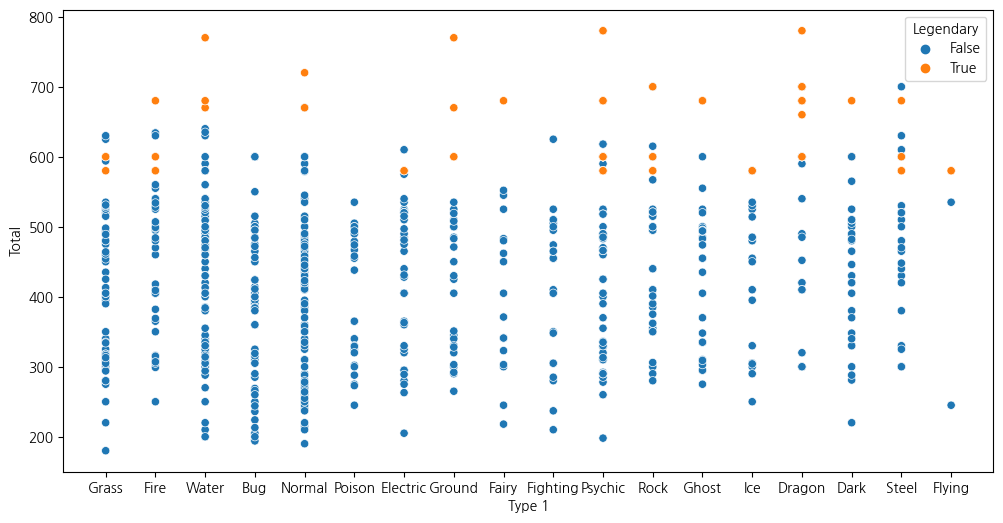

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

- 전설포켓몬의 경우 hue옵션을 통해 색상을 다르게 하도록 했습니다.
- 주황색이 전설의 포켓몬을 의미합니다.
- 전반적으로 전설의 포켓몬이 각 타입의 포켓몬중 가장 강하거나 상위권에 해당하는 stats을 갖고 있는 것으로 보입니다.

#### 세부스탯: HP, Attack, Defense, Sp. Atk, Sp. Def, Speed 살펴보기

- 각 스탯과 포캣몬의 전체 스탯간의 관계를 scatter plot으로 시각화 해보겠습니다.
- 각 subplot에는 스탯과 Total의 관계가 표시되고, 전설의 포캣몬은 이전과 같이 주확생(True)로 구분됩니다.

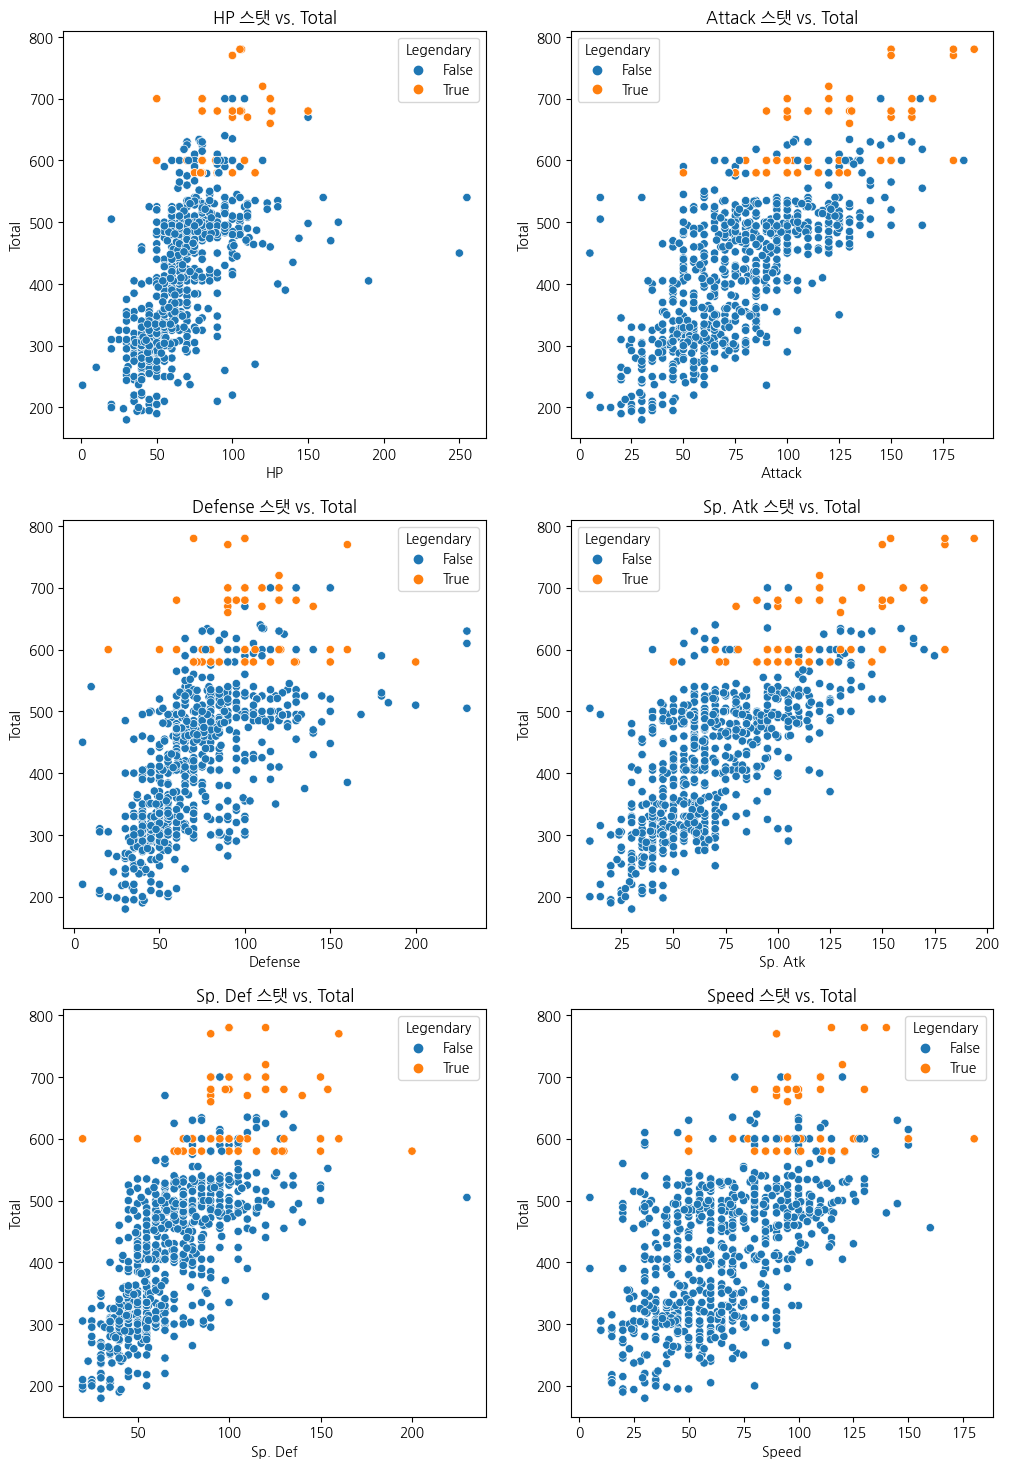

In [ ]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(12, 18)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

# "HP" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)
ax1.set_title("HP 스탯 vs. Total")

# "Attack" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)
ax2.set_title("Attack 스탯 vs. Total")

# "Defense" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)
ax3.set_title("Defense 스탯 vs. Total")

# "Sp. Atk" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)
ax4.set_title("Sp. Atk 스탯 vs. Total")

# "Sp. Def" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)
ax5.set_title("Sp. Def 스탯 vs. Total")

# "Speed" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)
ax6.set_title("Speed 스탯 vs. Total")

plt.show()

- HP, Defense, Sp. Def
    - 전설의 포캣몬은 주로 높은 스탯을 갖지만, 이 세가지의 스탯에서는 일반 포켓몬이 전설의 포켓몬보다 수치가 유독 높은 포켓몬들이 있습니다.
    - 하지만 그러한 포켓몬들도 Total 값은 특별히 높지 않은 것으로 보아 특정 스탯만 전설의 포캣몬보다 높은 것으로 보입니다.
    - 즉, 특정 속성에 특화된 포켓몬이라고 할 수있겠네요.(방어특화, 공격특화 등)
    
- Attack, Sp. Atk, Speed
    - 이 세가지 스탯은 Total과 거의 비례합니다.
    - 전설의 포켓몬들이 각 스탯의 최대치를 차지하고 있습니다.
    
---

- 어떤 포켓몬들이 특화된 포켓몬인지 살펴보겠습니다.

#### 전설의 포켓몬보다 Total 스탯이 높은 포켓몬

In [ ]:
# 전설의 포켓몬과 일반 포켓몬을 분리
legendary_pokemon = pokemon[pokemon['Legendary'] == True]
ordinary_pokemon = pokemon[pokemon['Legendary'] == False]

# 전설의 포켓몬의 Total 평균 계산
legendary_mean_total = legendary_pokemon['Total'].mean()

# 일반 포켓몬 중에서 Total이 전설의 포켓몬 평균 Total보다 높은 포켓몬 찾기
higher_total_than_legendary = ordinary_pokemon[ordinary_pokemon['Total'] > legendary_mean_total]

# 결과 출력
display(higher_total_than_legendary)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
141,130,GyaradosMega Gyarados,Water,Dark,640,95,155,109,70,130,81,1,False
268,248,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
313,289,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False
409,373,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False
413,376,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False
494,445,GarchompMega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False


#### 전설의 포켓몬보다 특정 스탯이 높은 포켓몬들

In [ ]:
# 필요한 스탯 선택
selected_stats = ["HP", "Defense", "Sp. Def"]

# 전설의 포켓몬의 각 스탯 평균 계산
legendary_mean_stats = legendary_pokemon[selected_stats].mean()

# 일반 포켓몬 중에서 각 스탯이 전설의 포켓몬 평균 스탯보다 높은 포켓몬 찾기
higher_stats_than_legendary = ordinary_pokemon[
    (ordinary_pokemon[selected_stats] > legendary_mean_stats).all(axis=1)
]

# 각 스탯별로 높은 스탯을 가진 포켓몬 출력
for stat in selected_stats:
    print(f"{stat}에 대한 높은 스탯을 가진 포켓몬:")
    display(higher_stats_than_legendary)
    print()

HP에 대한 높은 스탯을 가진 포켓몬:


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
141,130,GyaradosMega Gyarados,Water,Dark,640,95,155,109,70,130,81,1,False
212,197,Umbreon,Dark,NaN,525,95,65,110,60,130,65,2,False
268,248,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
283,260,SwampertMega Swampert,Water,Ground,635,100,150,110,95,110,70,3,False
546,488,Cresselia,Psychic,NaN,600,120,70,120,75,130,85,4,False
591,531,AudinoMega Audino,Normal,Fairy,545,103,60,126,80,126,50,5,False



Defense에 대한 높은 스탯을 가진 포켓몬:


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
141,130,GyaradosMega Gyarados,Water,Dark,640,95,155,109,70,130,81,1,False
212,197,Umbreon,Dark,NaN,525,95,65,110,60,130,65,2,False
268,248,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
283,260,SwampertMega Swampert,Water,Ground,635,100,150,110,95,110,70,3,False
546,488,Cresselia,Psychic,NaN,600,120,70,120,75,130,85,4,False
591,531,AudinoMega Audino,Normal,Fairy,545,103,60,126,80,126,50,5,False



Sp. Def에 대한 높은 스탯을 가진 포켓몬:


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
141,130,GyaradosMega Gyarados,Water,Dark,640,95,155,109,70,130,81,1,False
212,197,Umbreon,Dark,NaN,525,95,65,110,60,130,65,2,False
268,248,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
283,260,SwampertMega Swampert,Water,Ground,635,100,150,110,95,110,70,3,False
546,488,Cresselia,Psychic,NaN,600,120,70,120,75,130,85,4,False
591,531,AudinoMega Audino,Normal,Fairy,545,103,60,126,80,126,50,5,False


- 모두가 그런것은 아니지만 'Mega'가 붙는 진화된 포켓몬들이 보입니다.
- 또한 세 스탯에서 모두 같은 포켓몬들이 보이는것으로 보아 해당 포켓몬들은 방어력에 특화된 포켓몬으로 보입니다.

#### Generation : 포켓몬 세대 정보

- Generation은 각 포켓몬의 "세대"로, 현재 데이터셋에는 1~6세대의 포켓몬이 존재합니다.
- 각 세대에 대한 포켓몬의 수를 확인해보겠습니다.

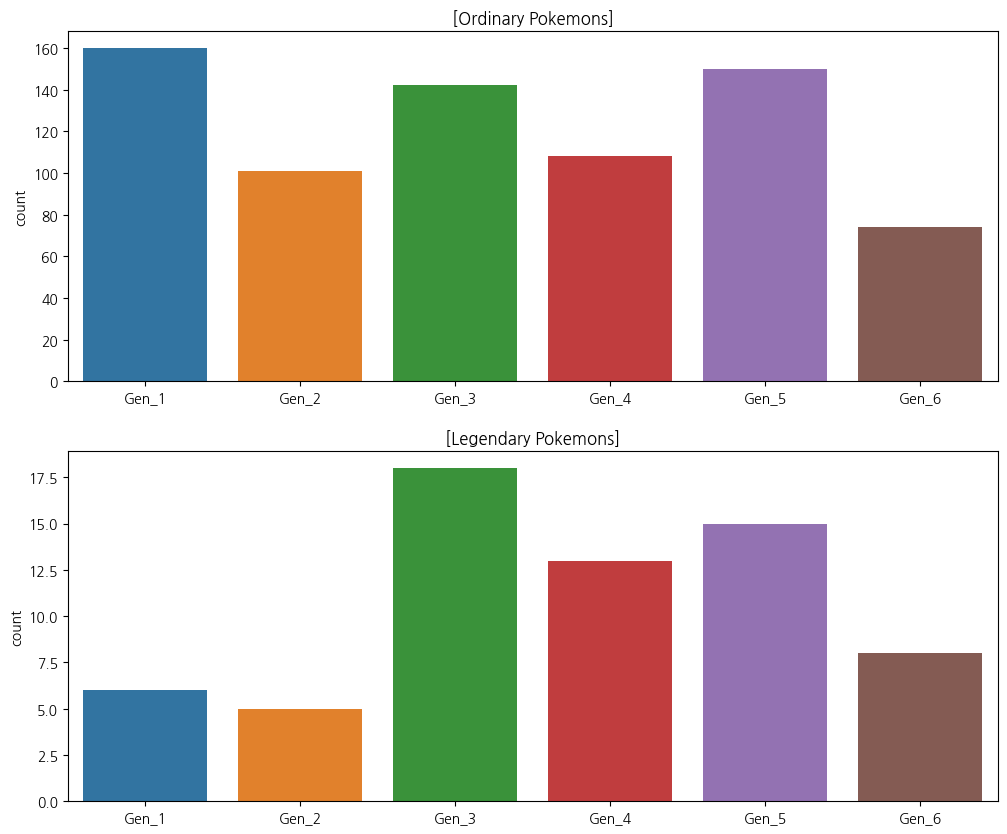

In [ ]:
plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
ax1 = sns.countplot(data=ordinary, x="Generation")
ax1.set_xlabel('')
ax1.set_xticklabels(['Gen_' + str(x.get_text()) for x in ax1.get_xticklabels()]) # `Gen_`을 prefix로 추가
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
ax2 = sns.countplot(data=legendary, x="Generation")
ax2.set_xlabel('')
ax2.set_xticklabels(['Gen_' + str(x.get_text()) for x in ax2.get_xticklabels()])
plt.title("[Legendary Pokemons]")

plt.show()

- 전설의 포켓몬은 1,2세대애는 많지 않고 3세대에 많이 등장했습니다.
- 이후 4~6세대애는 1,2세대에 비해서는 꾸준하게 분포하고 있음을 알 수 있습니다.

### 전설의 포켓몬 vs 일반 포켓몬(1) - Total값

- 모델 구축의 목적은 전설의 포켓몬을 구분해내는 것입니다.
- 이를 위해 전설 포켓몬의 특징을 도출해보겠습니다.

#### 전설의 포켓몬의 Total값

- 전설의 포켓몬의 Type 1 데이터와 Total(총 스탯)간의 상관관계를 시각화한 scatter plot입니다.
- 이를 통해 전설의 포켓몬의 주요 유형(Type 1)과 그들의 총 스탯사이 분포나 상관관계를 확인합니다.

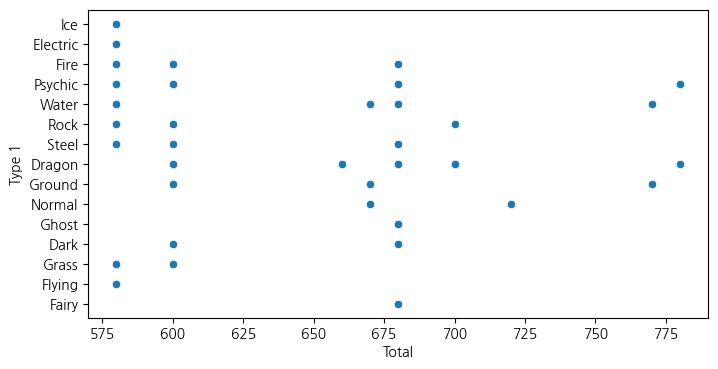

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

- 그래프로 보아 전설의 포캣몬들의 Total값이 특정 값에 몰려있는 것 같습니다.

In [ ]:
print(sorted(list(set(legendary["Total"]))))

[580, 600, 660, 670, 680, 700, 720, 770, 780]


- 실제로 Total값의 고유값을 추출해보니 9개의 값만이 존재합니다.
- 이를 다시 시각화 해보면 아래와 같습니다.

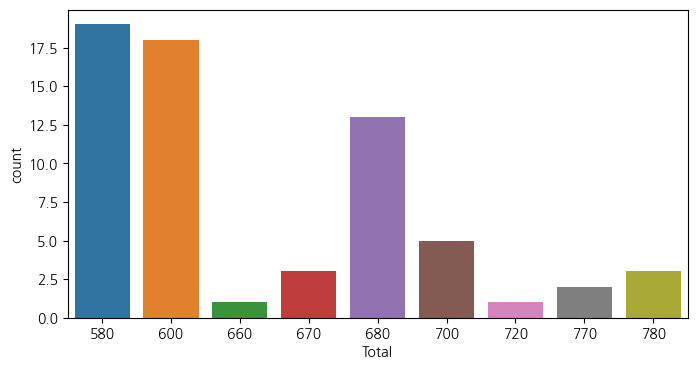

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

- 앞선 EDA에서 전설 포켓몬의 총 수는 65마리이인데, 이 포켓몬들의 Total값은 9종류에 한정됩니다.

In [ ]:
round(65 / 9, 2)

7.22

- 이렇게 보면 평균적으로 약 7.22마리의 전설의 포켓몬은 같은 Total 스탯을 가진다는 의미입니다.
- 이것이 전설의 포켓몬을 분류하는 특징이 될 수 있을 것 같습니다.

#### 일반 포켓몬의 Total값

- 일단 일반 포켓몬의 Total값 집합과 그 크기를 확인해봅니다.

In [ ]:
ordinary_total = (sorted(list(set(ordinary["Total"]))))
print(ordinary_total)

len(ordinary_total)

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700]


195

- 일반포켓몬의 경우 총 195개의 Total 속성값을 가집니다.
- 일반 포켓몬은 735마리 이므로 전설 포켓몬과 같은 방식으로 계산을 해보면 평균적으로 약 3.77마리의 일반 포캣몬이 같은 Total 스탯을 갖고 있습니다.
- 전설의 포캣몬에 비해서는 현저히 낮은 수치입니다.

In [ ]:
round(735 / 195, 2)

3.77

- Total 값의 다양성은 일반 포켓몬이 전설의 포켓몬보다 두 배 가량 더 많습니다.
    - 즉, 전설의 포켓몬의 Total값은 다양하지 않습니다.
    - 이는 **한 포켓몬의 Total 속성값이 전설의 포켓몬의 값의 집합에 포함되는지 여부를 통해 전설의 포켓몬을 구분하는 주요 방법으로 사용할 수 있다는 의미** 입니다.
    

- 전설의 포켓몬이 Total값 중에는 일반 포켓몬이 가지지 못하는 특정 값이 있습니다.
    - 이를 통해 전설의 포켓몬 여부를 구별할 수 있을 겁니다.

In [ ]:
legendary_total = sorted(list(set(legendary["Total"])))
ordinary_total = sorted(list(set(ordinary["Total"])))

difference = set(legendary_total) - set(ordinary_total)

print("legendary에는 있고 ordinary에는 없는 값:", difference)

legendary에는 있고 ordinary에는 없는 값: {770, 680, 780, 720, 660}


- 적어도 위 5개의 값이 Total인 포켓몬은 무조건 전설의 포켓몬이라고 말할 수 있습니다.

### 전설의 포켓몬 vs 일반 포켓몬(2) - Name값

- 모델 구축의 목적은 전설의 포켓몬을 구분해내는 것입니다.
- 이를 위해 전설 포켓몬의 특징을 도출해보겠습니다.

---

- 앞선 분석을 보면 특정 단어(Mega나 X, Y 등)가 들어가 있거나 긴 이름을 가진 포켓몬이 상당수 있었음을 눈치 챘을 겁니다.
- 먼저 특정 단어가 들어간 이름이 얼마나 많은지 확인해보겠습니다.

In [ ]:
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


- 대부분 비슷한 이름들이 눈에 띕니다.
- Name의 경우 모든 컬럼이 unique한 값들로 이뤄진 것을 확인했었는데, 전설의 포켓몬 사이에서도 비슷한 이름이 다수 존재하고 있음을 알 수 있습니다.
- 특히 nltk의 형태소 분석을 통해 결과를 도출해본 결과 'Groudon', 'Latios', 'Forme', 'Rayquaza', 'Kyogre', 'Kyurem', 'Latias', 'Mewtwo', 'MewtwoMega' 와 같은 글자들이 공통적으로 추출되고 있음을 알 수 있습니다.

- 또한 forme가 들어가는 여러가지 전설의 포켓몬이 있는 경우도 있습니다.

In [ ]:
formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


- 전설의 포켓몬이면서 공통된 이름을 가지는 경우가 무엇인지 전부 살펴보겠습니다.

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# NLTK 라이브러리 초기화 (이 부분은 프로그램 시작 시 한 번만 실행하면 됩니다)
nltk.download('punkt')

def find_common_morphemes(df, column_name):
    """
    DataFrame에서 지정된 컬럼의 값들을 가져와 공통된 형태소를 찾는 함수.

    :param df: DataFrame
    :param column_name: 형태소를 추출할 컬럼의 이름
    :return: 공통된 형태소 리스트
    """
    # 지정된 컬럼에서 값들을 가져와 하나의 문자열로 합치기
    combined_str = ' '.join(df[column_name])

    # 형태소 분석
    tokens = word_tokenize(combined_str)
    tokens = [word for word in tokens if word.isalnum()]  # 알파벳과 숫자만 남김

    # 공통된 형태소 찾기
    common_morphemes = [word for word in set(tokens) if tokens.count(word) > 1]

    return common_morphemes


common_morphemes_legend = find_common_morphemes(legendary, 'Name')
print("공통된 형태소:", common_morphemes_legend)

공통된 형태소: ['Groudon', 'Latios', 'Forme', 'HoopaHoopa', 'Rayquaza', 'Kyogre', 'Kyurem', 'Latias', 'Mewtwo', 'MewtwoMega', 'Diancie']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


- 앞서 찾은 것과 추가로 찾은 Forme를 포함해 아래와 같은 단어들이 공통적으로 전설의 포켓몬들에는 들어 있음을 알 수 있습니다.
    - 'Groudon', 'Latios', 'Forme', 'HoopaHoopa', 'Rayquaza', 'Kyogre', 'Kyurem', 'Latias', 'Mewtwo', 'MewtwoMega', 'Diancie'
    
- 차후에 분석해보겠지만 일반포켓몬의 경우는 어떨까요?

In [ ]:
common_morphemes_ordinary = find_common_morphemes(ordinary, 'Name')
print("공통된 형태소:", common_morphemes_ordinary)

공통된 형태소: ['Heracross', 'Lucario', 'Alakazam', 'Houndoom', 'Mode', 'Forme', 'Glalie', 'Tyranitar', 'Kangaskhan', 'Aerodactyl', 'Rotom', 'Gyarados', 'Audino', 'Beedrill', 'Manectric', 'Swampert', 'Medicham', 'Sharpedo', 'Banette', 'Absol', 'Metagross', 'Lopunny', 'Sceptile', 'Scizor', 'Sableye', 'Steelix', 'Pidgeot', 'Pinsir', 'Salamence', 'Aggron', 'Size', 'Mime', 'Blaziken', 'Gengar', 'Slowbro', 'Camerupt', 'Altaria', 'Venusaur', 'Blastoise', 'Ampharos', 'Cloak', 'Garchomp', 'Mawile', 'Charizard', 'Gardevoir', 'Gallade', 'Abomasnow', 'CharizardMega']


- 두 그룹간 공통으로 들어가는 이름이 있는지, 전설의 포켓몬에만들어가는 이름이 무엇인지도 살펴보겠습니다.

In [ ]:
# 집합으로 변환
set_legend = set(common_morphemes_legend)
set_ordinary = set(common_morphemes_ordinary)

# 교집합 찾기
intersection = set_legend & set_ordinary

# common_morphemes_legend에만 있는 요소 찾기
unique_to_legend = set_legend - set_ordinary

print("교집합:", intersection)
print("Legend에만 있는 요소:", unique_to_legend)

교집합: {'Forme'}
Legend에만 있는 요소: {'Groudon', 'Latios', 'Rayquaza', 'MewtwoMega', 'Kyogre', 'HoopaHoopa', 'Diancie', 'Kyurem', 'Latias', 'Mewtwo'}


- 추가로 찾았던 Forme은 양쪽에 모두 공통으로 있는 단어였습니다.
- 이 단어는 전설의 포켓몬을 찾기위한 요소로 구분할 필요는 없을 것 같습니다.
- 다만 **`unique_to_legend` 로 도출한 단어들은 차후 모델링을 할때 특성으로 활용할 수 있겠습니다.**

---

- 모두가 그런것은 아니지만 저런식의 키워드가 붙으면서 이름이 긴 전설의 포켓몬이 존재합니다.
- 이름 길이(name_count)라는 컬럼을 만들고, 파이썬의 람다함수를 응용해 각 포켓몬별 파일(legendary, ordinary)에 결과를 추가하겠습니다.

In [ ]:
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [ ]:
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


- 이 두 데이터가 어떤 특성을 갖고 있는지 시각화 해보겠습니다.

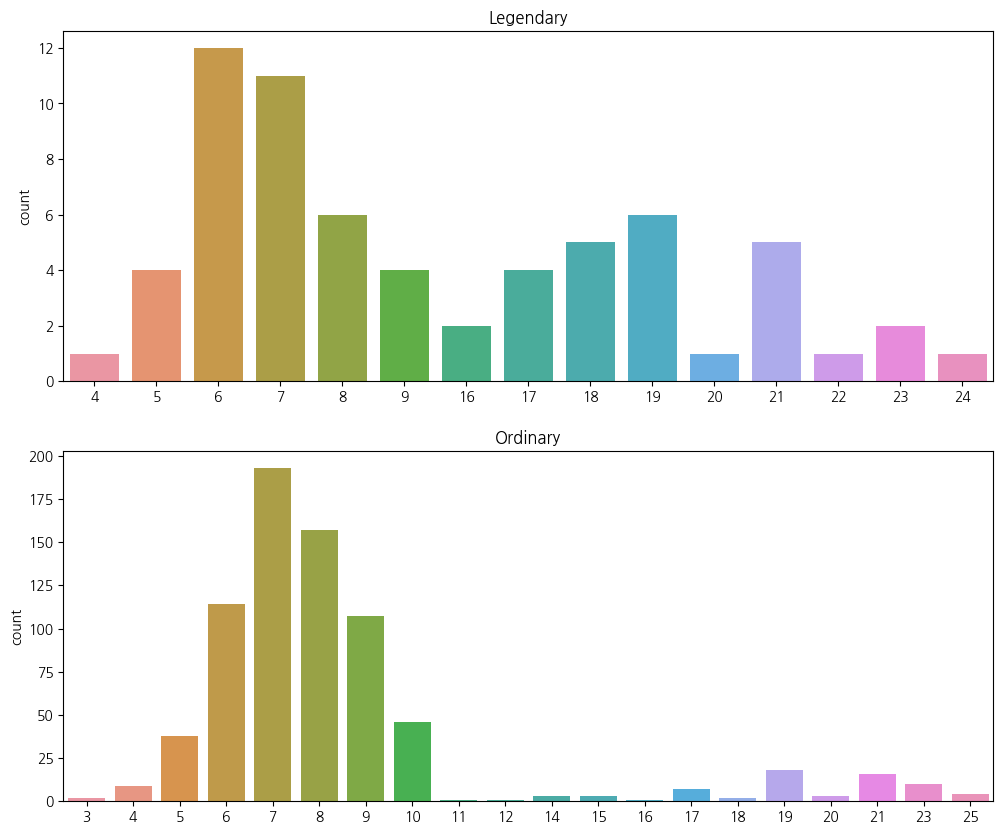

In [ ]:
plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

- 전설의 포켓몬은 이름이 6 ~ 7글자인 경우가 많고, 그 다음으로 17자~19자(또는 21자)인 개체가 많습니다.
- 반면에 일반포켓몬의 경우 6~10글자 사이의 이름을 가진 개체가 많습니다. 그리고 10자 이상의 이름을 가진 포켓몬이 거의 없습니다.
- 전설의 포켓몬의 이름이 10글자 이상일 확률을 구해보겠습니다.

In [ ]:
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

41.54 %


- 전설의 포켓몬의 이름이 10글자 이상일 확률은 약 42%로 상당한 확률로 10글자 이상의 이름을 가질 확률이 높습니다.
- 일반포켓몬의 경우도 확률을 구해보겠습니다.

In [ ]:
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

15.65 %


- 전설의 포켓몬에 비해 현저하게 낮은 확률을 갖고 있는 것을 알 수 있습니다.
- 정리해보자면 아래와 같은 인사이트를 발굴했습니다.
    - **만약 "Latios"가 전설의 포켓몬이라면, "%%% Latios" 또한 전설의 포켓몬이다!**
    - **적어도 전설의 포켓몬에서 높은 빈도를 보이는 이름들의 모임이 존재한다!**
    - **전설의 포켓몬은 긴 이름을 가졌을 확률이 높다!**

## 전처리 (1) - 이름의 길이

- 기본적으로 머신러닝에서는 문자열을 데이터로 입력할 수 없기 때문에 적절한 전처리가 필요합니다.
- 문자열 데이터를 처리하는 방법은 다양합니다.
    - 문자의 길이를 count해서 숫자로 변환
    - True, False값을 가지는 Bool데이터로 변환(모델 입력시 1 또는 0이 입력)
    - 카테고리(범주)가 있는데이터(현재 데이터의 Type 컬럼 데이터등)은 Encoding을 해서 숫자로 변환

---

- 앞서 발굴한 인사이트에서 Name의 값은 전설의 포켓몬을 구별하기 위한 주요 요소임을 파악했습니다.
- 이를 위해 2가지 전처리를 하겠습니다.
    - 이름의 길이를 처리(10글자가 넘는지 유무를 기준으로) categorical 데이터로 변환
    - 전설의 포켓몬에서 많이 등장하는 토큰을 추려내고 토큰 포함 여부를 원-핫 인코딩으로 처리

### Name의 길이가 10이상인가 아닌가

- 전체 데이터에 이름의 길이를 count해서 입력할 name_count라는 컬럼을 생성하고, Name에서 길이를 확인하여 입력합니다.

In [ ]:
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


- name_count컬럼을 기반으로 이름의 길이가 10이상이면 True, 아니면 False인 long_name컬럼을 생성합니다.

In [ ]:
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


- 일단은 현재까지 EDA를 통해 밝혀낸 특성을 기반으로 값을 추출했지만, 이 데이터가 모델이 전설의 포켓몬을 구분하는데 적합한 데이터인지는 아직 알 수 없습니다.
- 모델 학습시에 변수를 조정해가면서 결과를 보고 조정하도록 하겠습니다.

### Name에 자주 쓰이는 토큰 추출하기

- 포켓몬의 이름은 총 4가지 타입으로 나뉜다고 합니다.
    - 한 단어면 ex. Venusaur
    - 두 단어이고, 앞 단어는 두 개의 대문자를 가지며 대문자를 기준으로 두 부분으로 나뉘는 경우 ex. VenusaurMega Venusaur
    - 이름은 두 단어이고, 맨 뒤에 X, Y로 성별을 표시하는 경우 ex. CharizardMega Charizard X
    - 알파벳이 아닌 문자를 포함하는 경우 ex. Zygarde50% Forme
    
---

- 일단 이름에 알파벳이 아닌 문자가 들어간 경우에 대해 전처리를 하겠습니다.
    - 어떤 문자열이 알파벳으로 이뤄졌는지 아닌지는 판다스의 `isalpha()`를 통해 확인할 수 있습니다.
    - 단 `isalpha()`는 띄어쓰기가 있는 경우에도 False를 반환합니다.
    - 따라서 띄어쓰기가 없는 컬럼을 따로 만들고 난 뒤, 띄어쓰기를 빈칸 처리해서 처리하겠습니다.

In [ ]:
"""
- DataFrame의 Name 컬럼에 있는 각 값(i)에 대하여, lambda 함수를 사용
- lambda 함수는 각 이름(i)에서 모든 공백(" ")을 제거(replace(" ", ""))
"""

pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion


- `Name_nospace` 컬럼을 보면 이름에 띄어쓰기가 모두 사라진 것을 볼 수 있습니다.
- 이제 이 컬럼에 `isalpha()`를 적용해 영문만으로 이뤄졌는지를 확인해보겠습니다.

In [ ]:
"""
- pokemon DataFrame에서 Name_nospace라는 컬럼을 참조
- Name_nospace 컬럼의 각 값(i)에 대해 지정된 함수를 적용
- lambda 함수는 각 값(i)에 대해 isalpha() 메소드를 호출
- isalpha() 메소드는 문자열이 오직 알파벳 문자(즉, 숫자나 특수 문자가 없는 경우)로만 구성되어 있으면 True를, 그렇지 않으면 False를 반환
"""
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


- 도출된 `name_isalpha` 를 활용해 알파벳이 아닌 문자가 포함된 Name을 가진 포켓몬들을 살펴보겠습니다.

In [ ]:
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


- 다행히 많은 개체수가 아니라 9마리의 포켓몬만 영문이 아닌 이름을 포함하고 있습니다.
- 이정도는 전처리로서 사용자가 임의로 값을 바꿔줘도 될 것 같습니다.
- 간단하게 pandas의 replace()를 써서 바뀔대상과 바꿀값을 입력해 전처리를 하도록 하겠습니다.

In [ ]:
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon Two,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


- 바꿔준 'Name' 컬럼으로 'Name_nospace'를 만들고, 다시 isalpha()로 체크해보겠습니다.

In [ ]:
# 'Name' 컬럼에서 공백을 제거하여 'Name_nospace' 컬럼을 만듭니다.
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda name: name.replace(" ", ""))

# 각 이름이 알파벳 문자로만 이루어져 있는지 체크하여 'name_isalpha' 컬럼을 만듭니다.
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda name: name.isalpha())

pokemon[pokemon["name_isalpha"] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha


- name_isalpha 컬럼이 False인 컬럼이 하나도 없습니다. 이는 모든 이름이 알파벳으로만 이루어졌음을 의미합니다.
- 이제 Name을 띄어쓰기 & 대문자 기준으로 분리해 토큰화 하는 작업을 진행하겠습니다.
    - 이를 위개 `re`모듈을 통해 정규표현식으로 토큰화를 해주겠습니다.
    
- 예를들자면 `CharizardMega Charizard X` 라는 이름을 적절히 쪼개서 토큰이 담긴 리스트로 만드는 것입니다.

In [ ]:
import re # re 모듈 불러오기

# 실습
name = "CharizardMega Charizard X"

# 쪼개기
name_split = name.split(" ")
name_split

['CharizardMega', 'Charizard', 'X']

- 위와 같이 공백을 기준으로 이름을 쪼갤 수 있습니다.
- 하지만 결론적으로 하려는것은 이러한 공백을 기준으로 쪼갠 뒤 다시 CharizardMega 를 Charizard와 Mega로 나누는 것입니다.
- 이작업은 공백이 아닌 `대문자`를 기준으로 쪼갠다면 가능할 것 같습니다.

In [ ]:
temp = name_split[0] # 쪼개고 싶은 요소가 CharizardMega  이므로 해당 인자만 별도로 저장
temp

'CharizardMega'

In [ ]:
# 정규표현식을 사요해 대문자로 시작해서 소문자로 끝나는 패턴을 찾기

tokens = re.findall('[A-Z][a-z]*', temp)
tokens

['Charizard', 'Mega']

- `[A-Z][a-z]*` 패턴에 대한 설명
    - [A-Z] : A부터 Z까지의 대문자 중 한 가지로 시작하고,
    - [a-z] : 그 뒤에 a부터 z까지의 소문자 중 한 가지가 붙는데,
    - * : 그 소문자의 개수는 하나 이상인 패턴 (*는 정규표현식 중에서 "반복"을 나타내는 기호)
- 즉 첫글자가 대문자인 단어를 분리하는데 효과적인 정규표현식

---

- 위에 실행한 과정을 for문으로 한번에 실행하면 아래와 같습니다.

In [ ]:
tokens = []
for part_name in name_split:
    a = re.findall('[A-Z][a-z]*', part_name)
    tokens.extend(a)
tokens

['Charizard', 'Mega', 'Charizard', 'X']

- 위와 같은 코드를 통해 한 개의 이름을 토큰화 할 수 있습니다.
- 하지만 우리는 pokemon의 모든 Names에 대해 이 함수를 적용해야 합니다.
- 이를 위해 함수화를 하고 lambda함수를 쓴다면 손쉽게 처리가 가능할 것 같습니다.

In [ ]:
# 함수 생성
# 원래 re모듈도 필요하지만 위에서 선언했으므로 생략합니다.
# 모듈은 함수 밖에서 선언하는 것이 메모리 절약에 효과적입니다.
# 함수를 사용할때마다 모듈을 불러오는것은 매우 비효율적인 코드 작성방법입니다.

def tokenize(input_str):
    """
    입력된 문자열에서 각 부분의 첫 글자가 대문자이고 그 뒤에 소문자가 따르는 패턴을 찾아 반환하는 함수.

    :param input_str: 문자열
    :return: 찾아낸 패턴의 리스트
    """
    tokens = []
    name_split = input_str.split()  # 공백으로 문자열 분리
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)
    return np.array(tokens)

# 테스트
name = "CharizardMega Charizard X"
tokenize(name)

array(['Charizard', 'Mega', 'Charizard', 'X'], dtype='<U9')

- 함수가 정상적으로 작동하고 있음을 알 수 있습니다.
- 이제 이 함수를 전설의 포켓몬에 모두 적용시켜 보겠습니다.

In [ ]:
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

- 중복을 제외하고 총 65개의 토큰이 생성되었습니다.
- 이중 빈번하게 사용되는 토큰을 추출해 보겠습니다.
    - 이를 위해서는 파이썬의 collection 패키지를 사용하면 손쉽게 추출이 가능합니다.

In [ ]:
from collections import Counter

# Counter는 각 요소가 몇개인지를 담은 튜플 리스트를 return
a = [1, 1, 0, 0, 0, 1, 1, 2, 3]
Counter(a)

Counter({1: 4, 0: 3, 2: 1, 3: 1})

In [ ]:
# most_common()은 가장 많은 요소순으로 등장횟수를 카운트해서 return
Counter(a).most_common()

[(1, 4), (0, 3), (2, 1), (3, 1)]

- 이러한 collection의 기능을 이용해 위헤서 만든 전설의 포켓몬을 토큰화한 데이터에서 가장 빈번하게 출현하는 토큰을 찾아보겠습니다.

In [ ]:
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

- 전설의 포켓몬 이름에는 Forme가 15번이나 쓰였고, 진화를 했을 때 붙는 이름인 Mega도 6번 쓰였습니다.
- 전설의 포켓몬이 전체 65마리인데 그 중 15번, 5번씩 쓰였다는건 상당히 높은 볼륨을 차지함을 의미합니다.

---

- 마지막으로 전설의 포켓몬이름에 등장하는 토큰이 일반 포켓몬에도 있는지 여부를 판단하는 컬럼을 생성하겠습니다.
    - pandas를 통해 문자열 데이터셋에서 특정 구문이 포함되었는지는 `str.contains`로 손쉽게 파악이 가능합니다.

In [ ]:
for token, _ in most_common:
    # pokemon[token] = ... 형식으로 사용하면 뒤에서 warning이 발생합니다
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,10,True,Charmeleon,True,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,9,False,Charizard,True,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,25,True,CharizardMegaCharizardX,True,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,25,True,CharizardMegaCharizardY,True,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,8,False,Squirtle,True,False,False,False,False,False,False,False,False,False,False


- Counter로 가장 빈번하게 출현한 토큰이 most_common에 담겨있습니다.
- 이 각 원소를 순환(token)하면서 아래의 코드들을 실행합니다.
    - pokemon의 Name컬럼에서 token에 해당하는 문자열을 찾으면 해당 토큰명으로된 컬럼에 True를 return

## 전처리 (2) - 범주형 데이터(Type 1 & Type 2) 전처리 : One Hot Encoding

- 앞서 살펴본 바와 같이 Type컬럼의 경우 한가지 속성만을 가진 포켓몬도 있고 두가지 속성을 모두 가진 포켓몬도 있습니다.
- 그리고 속성의 개수가 정해져 있습니다.
- 이런류의 데이터를 categorical(범주형) 데이터라고 합니다.
- 이런 데이터의 경우 One Hot Encoding을 통해 각각의 카테고리별로 컬럼을 만들고, 해당 카테고리에 해당하면 1을, 해당하지 않으면 0을 입력하는 식으로 변경할 수 있습니다.

In [ ]:
# EDA때몬 포켓몬의 타입에 대한 데이터입니다.
print(types)

['Fire', 'Water', 'Flying', 'Fairy', 'Dragon', 'Normal', 'Steel', 'Bug', 'Grass', 'Dark', 'Ground', 'Fighting', 'Ice', 'Rock', 'Poison', 'Psychic', 'Ghost', 'Electric']


- 이를 사용해서 각 타입(Type 1, Type 2)컬럼별로 types에 속한값과 일치한 값을 갖고 있으면 해당 컬럼을 생성하고 원핫엔코딩을 하도록 적용해보겠습니다.

In [ ]:
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)

pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Fire,Water,Flying,Fairy,Dragon,Normal,Steel,Bug,Grass,Dark,Ground,Fighting,Ice,Rock,Poison,Psychic,Ghost,Electric
0,Grass,Poison,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
1,Grass,Poison,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
2,Grass,Poison,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
3,Grass,Poison,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
4,Fire,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


- for t in types:는 types 리스트의 각 항목을 t라는 변수로 순회하며 아래의 작업을 수행
    - pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)은 각 포켓몬의 데이터프레임에 새로운 열을 추가하는 부분
    - t 타입에 해당하는 열을 생성하고, 그 열에는 불리언(True 또는 False) 값을 할당
    - 해당 포켓몬이 Type 1 또는 Type 2 중 하나에 해당 타입을 가지고 있는지 여부를 의미
    -  즉, 포켓몬이 특정 타입을 가지고 있으면 True를, 그렇지 않으면 False를 입력
- pokemon[[["Type 1", "Type 2"] + types][0]].head()은 데이터프레임 pokemon에서 선택된 열들을 출력하는 부분

- 출력 결과를 보면 각 포켓몬의 타입인 Grass나 Poision이라는 컬럼에만 True가 입력되어 있고, 나머지 컬럼에는 모두 False가 입력되어 있는 것을 알 수 있습니다.

# 베이스라인(Baseline)모델 만들기

- EDA나 전처리를 통해 만든 컬럼이 아닌 기본 데이터만을 통해 모델을 생성해보겠습니다.
- 이런 베이스라인 모델을 만드는 이유는 성능은 안좋을 수 있으나, 기본 데이터로 성능 하한선을 만든다는 점이 포인트입니다.
- 이 하한선을 기반으로 차후 모델을 학습시키고 조정하면서 새로 만드는 모델이 올바른 방향으로 가고 있는지를 가늠할 수 있습니다.

In [ ]:
# 원본 데이터 불러오기
print(df.shape)
df.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


- 앞서 언급했듯이 머신러닝 모델에는 텍스트데이터를 직접적으로 변수로 넣을 수 없습니다.
- 베이스라인 모델이므로 텍스트가 들어있는 컬럼은 모두 제외하도록 하겠습니다.
- `df.columns`를 통해 해당 데이터 프레임에 어떤 컬럼명이 있는지를 확인할 수 있습니다.

In [ ]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'], dtype='object')

In [ ]:
# 위 컬럼을 보고 분석에 사용할 컬럼을 선정

features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

# target데이터인 Legendary컬럼도 별도로 저장
target = df['Legendary']

In [ ]:
X = df[features] # 설정한 컬럼만 추출


print(X.shape) # 데이터 구성 확인
X.head() # 상위 5개 데이터만 살펴보기

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [ ]:
# 타겟 데이터 저장 후 확인
y = target
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

### train/test 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


- 학습데이터에 640개의 데이터, 테스트데이터에 160개의 데이터가 분리되었습니다.
- 이 데이터를 학습시켜서 베이스라인모델을 만들도록 하겠습니다.

### 베이스라인모델 모델링

In [ ]:
from sklearn.tree import DecisionTreeClassifier # 모델 불러오기

model = DecisionTreeClassifier(random_state=25) # 모델선언
model

DecisionTreeClassifier(random_state=25)

In [ ]:
model.fit(X_train, y_train) # 모델학습
y_pred = model.predict(X_test) # 결과 예측
print('슝=3')

슝=3


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) # 예측 결과 출력

array([[144,   3],
       [  5,   8]], dtype=int64)

- 왼쪽 위부터 순서대로 TN, FP, FN, TP를 의미합니다.
- 현재 데이터에서 Positive는 Legendary=True(전설의 포켓몬), Negative는 Legendary=False(일반 포켓몬)입니다.
    - TN (True Negative) : 옳게 판단한 Negative, 즉 일반 포켓몬을 일반 포켓몬이라고 알맞게 판단한 경우입니다.
    - FP (False Positive) : 틀리게 판단한 Positive, 즉 일반 포켓몬을 전설의 포켓몬이라고 잘못 판단한 경우입니다.
    - FN (False Negative) : 틀리게 판단한 Negative, 즉 전설의 포켓몬을 일반 포켓몬이라고 잘못 판단한 경우입니다.
    - TP (True Positive) : 옳게 판단한 Positive, 즉 전설의 포켓몬을 전설의 포켓몬이라고 알맞게 판단한 경우입니다.
    
---

- 총 160개의 학습 데이터 중 FP와 FN은 합쳐서 8개뿐이니 나쁘지 않은 결과라고 할 수 있습니다.
- 정확도를 측정해 보겠습니다.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# 주어진 혼동 행렬
conf_matrix = [[144, 3], [5, 8]]

# 혼동 행렬에서 TP, TN, FP, FN 추출
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

# 정확도 계산
accuracy = (TP + TN) / (TP + TN + FP + FN)

print("정확도:", accuracy)

정확도: 0.95


- 정확도는 95%로 나쁘지 않은 결과처럼 보입니다.
- 하지만 기존에 노드에서 학습했듯이 정확도가 좋다고 해서 무조건 좋은 모델은 아닙니다.
- 더욱이 포켓몬 데이터는 전설포켓몬의 숫자가 전체 800마리중 65마리로 매우 불균형한 데이터 입니다.
    - 800마리를 전부 다 일반 포켓몬이라 모델이 예측해도 치소 735마리는 정답을 맞추고 시작합니다.
    - 아무런 학습 없이 모델이 찍기만해도 산술상 92% (735 / 800 * 100) 의 정확도를 가질 수 있는 수준입니다.
    - 즉, 지금의 정확도는 아무런 의미가 없습니다. 아니 이 모델이 좋은 성능인지 단정지을 수가 없습니다.
- 다른 척도로 모델을 평가해본다면 어떨까요?

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



- recall값을 보면 0.62로 상당히 낮은 편입니다.
    - recall값이 낮다는 것은 FN값이 높다는 것으로 이는 전설의 포켓몬임에도 일반 포켓몬이라 판단하는 경우가 많다는 것을 의미합니다.
- 이처럼 불균형이 심한 데이터는 적은양의 데이터인 Positive를 모델이 잘 찾아내는게 중요합니다.
- 학습이 덜된 경우 전설의 포켓몬을 일반 포켓몬으로 판단하고, 학습이 잘 될수록 적은 전설의 포켓몬을 찾아낼 것입니다.

## Feature Engineering을 통한 모델 향상시키기

In [ ]:
# 전처리했던 모든 컬럼 확인하기

print(len(pokemon.columns))
print(pokemon.columns)

45
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count', 'long_name', 'Name_nospace', 'name_isalpha', 'Forme', 'Mega', 'Mewtwo', 'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios', 'Kyogre', 'Groudon', 'Fire', 'Water', 'Flying', 'Fairy', 'Dragon', 'Normal', 'Steel', 'Bug', 'Grass', 'Dark', 'Ground', 'Fighting', 'Ice', 'Rock', 'Poison', 'Psychic', 'Ghost', 'Electric'], dtype='object')


- 기본 13개 컬럼에서 45개의 컬럼으로 증가했습니다.
- 이중 분류에 넣기 위해 제외해야할 컬럼도 있습니다.
    - 주로 문자열과관련된 컬럼일 것입니다.

In [ ]:
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

len(features)

38

- 총 38개의 컬럼이 남아 있습니다.
- 이 외에 정답인 Legendary를 별도로 저장하겠습니다.

In [ ]:
target = "Legendary"

target

'Legendary'

In [ ]:
X = pokemon[features] # 분석에 사용할 데이터 저장
print(X.shape)
X.head()

(800, 38)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,Forme,Mega,Mewtwo,Deoxys,Kyurem,Latias,Latios,Kyogre,Groudon,Hoopa,Poison,Ground,Flying,Normal,Water,Fire,Electric,Rock,Dark,Fairy,Steel,Ghost,Psychic,Ice,Bug,Grass,Dragon,Fighting
0,318,45,49,49,65,65,45,1,9,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,405,60,62,63,80,80,60,1,7,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,525,80,82,83,100,100,80,1,8,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,625,80,100,123,122,120,80,1,21,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,309,39,52,43,60,50,65,1,10,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


- 모든 데이터가 숫자 또는 bool형태로 구성되어 있어 모델 학습에 적절한 형태가 되었습니다.

In [ ]:
y = pokemon[target] # 정답 데이터 추출


print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

### train / test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


### 모델링

In [ ]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [ ]:
# Decision Tree 모델 생성
model = DecisionTreeClassifier()

# 훈련 데이터로 모델 학습
model.fit(X_train, y_train)  # X_train과 y_train은 훈련 데이터셋

# 모델을 사용하여 테스트 데이터의 예측 값 얻기
y_pred = model.predict(X_test)  # X_test는 테스트 데이터셋

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)

print("모델의 정확도:", accuracy)

모델의 정확도: 0.95625


In [ ]:
# confusion matrix 확인
conf_matrix = confusion_matrix(y_test, y_pred)


print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[141   6]
 [  1  12]]


In [ ]:
from sklearn.metrics import classification_report

# classification report 출력
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



- 베이스라인모델일때 0.62였던 recall값이 0.92로 모델 성능이 향상되었습니다.

---

# 회고

### KEEP
- 짧다면 짧은 기간동안 배운(사실은 복습한) 내용들을 잊지 않고 잘 써먹었다.
- 자연어 처리에서 배운 형태소분석을 통해 Name 컬럼 전처리할때 값을 찾는 작업을 시도해봤다.
- 데이터와 문제를 보면 어떤걸로 뭘해야 할지는 머리속에 잘 떠오른다. 배운 개념에 대한 이해가 되었기 때문일것이다.(라고 믿는다.)

### PROBLEM
- 정작 트러블 슈팅으로 다른분들이 질문해주시면 코드보고는 내용 파악을 잘 못하고 한참 들여다 봐야 한다. 코드 구조에 익숙치 않기 때문이 아닐까.
- 그래서인지 아직도 코드는 영 손에 안익는다. 구글링하고, 담아둔 코드들이 많아서 그런지 그것들을 가져다 복붙해서 쓰는 경우가 더 많은 것 같다.

### TRY
- 복붙해서 쓰더라도 시간 여유가 되면 타이핑을 좀 하자. 그래야 코드가 더 머리에 잘 들어오지!
- 많은 코드를 보는건 이미 충분히 한거같다. 이제는 많이 치는 시도를 더 해보자.